SQ POLICY GRAPHS (test data)


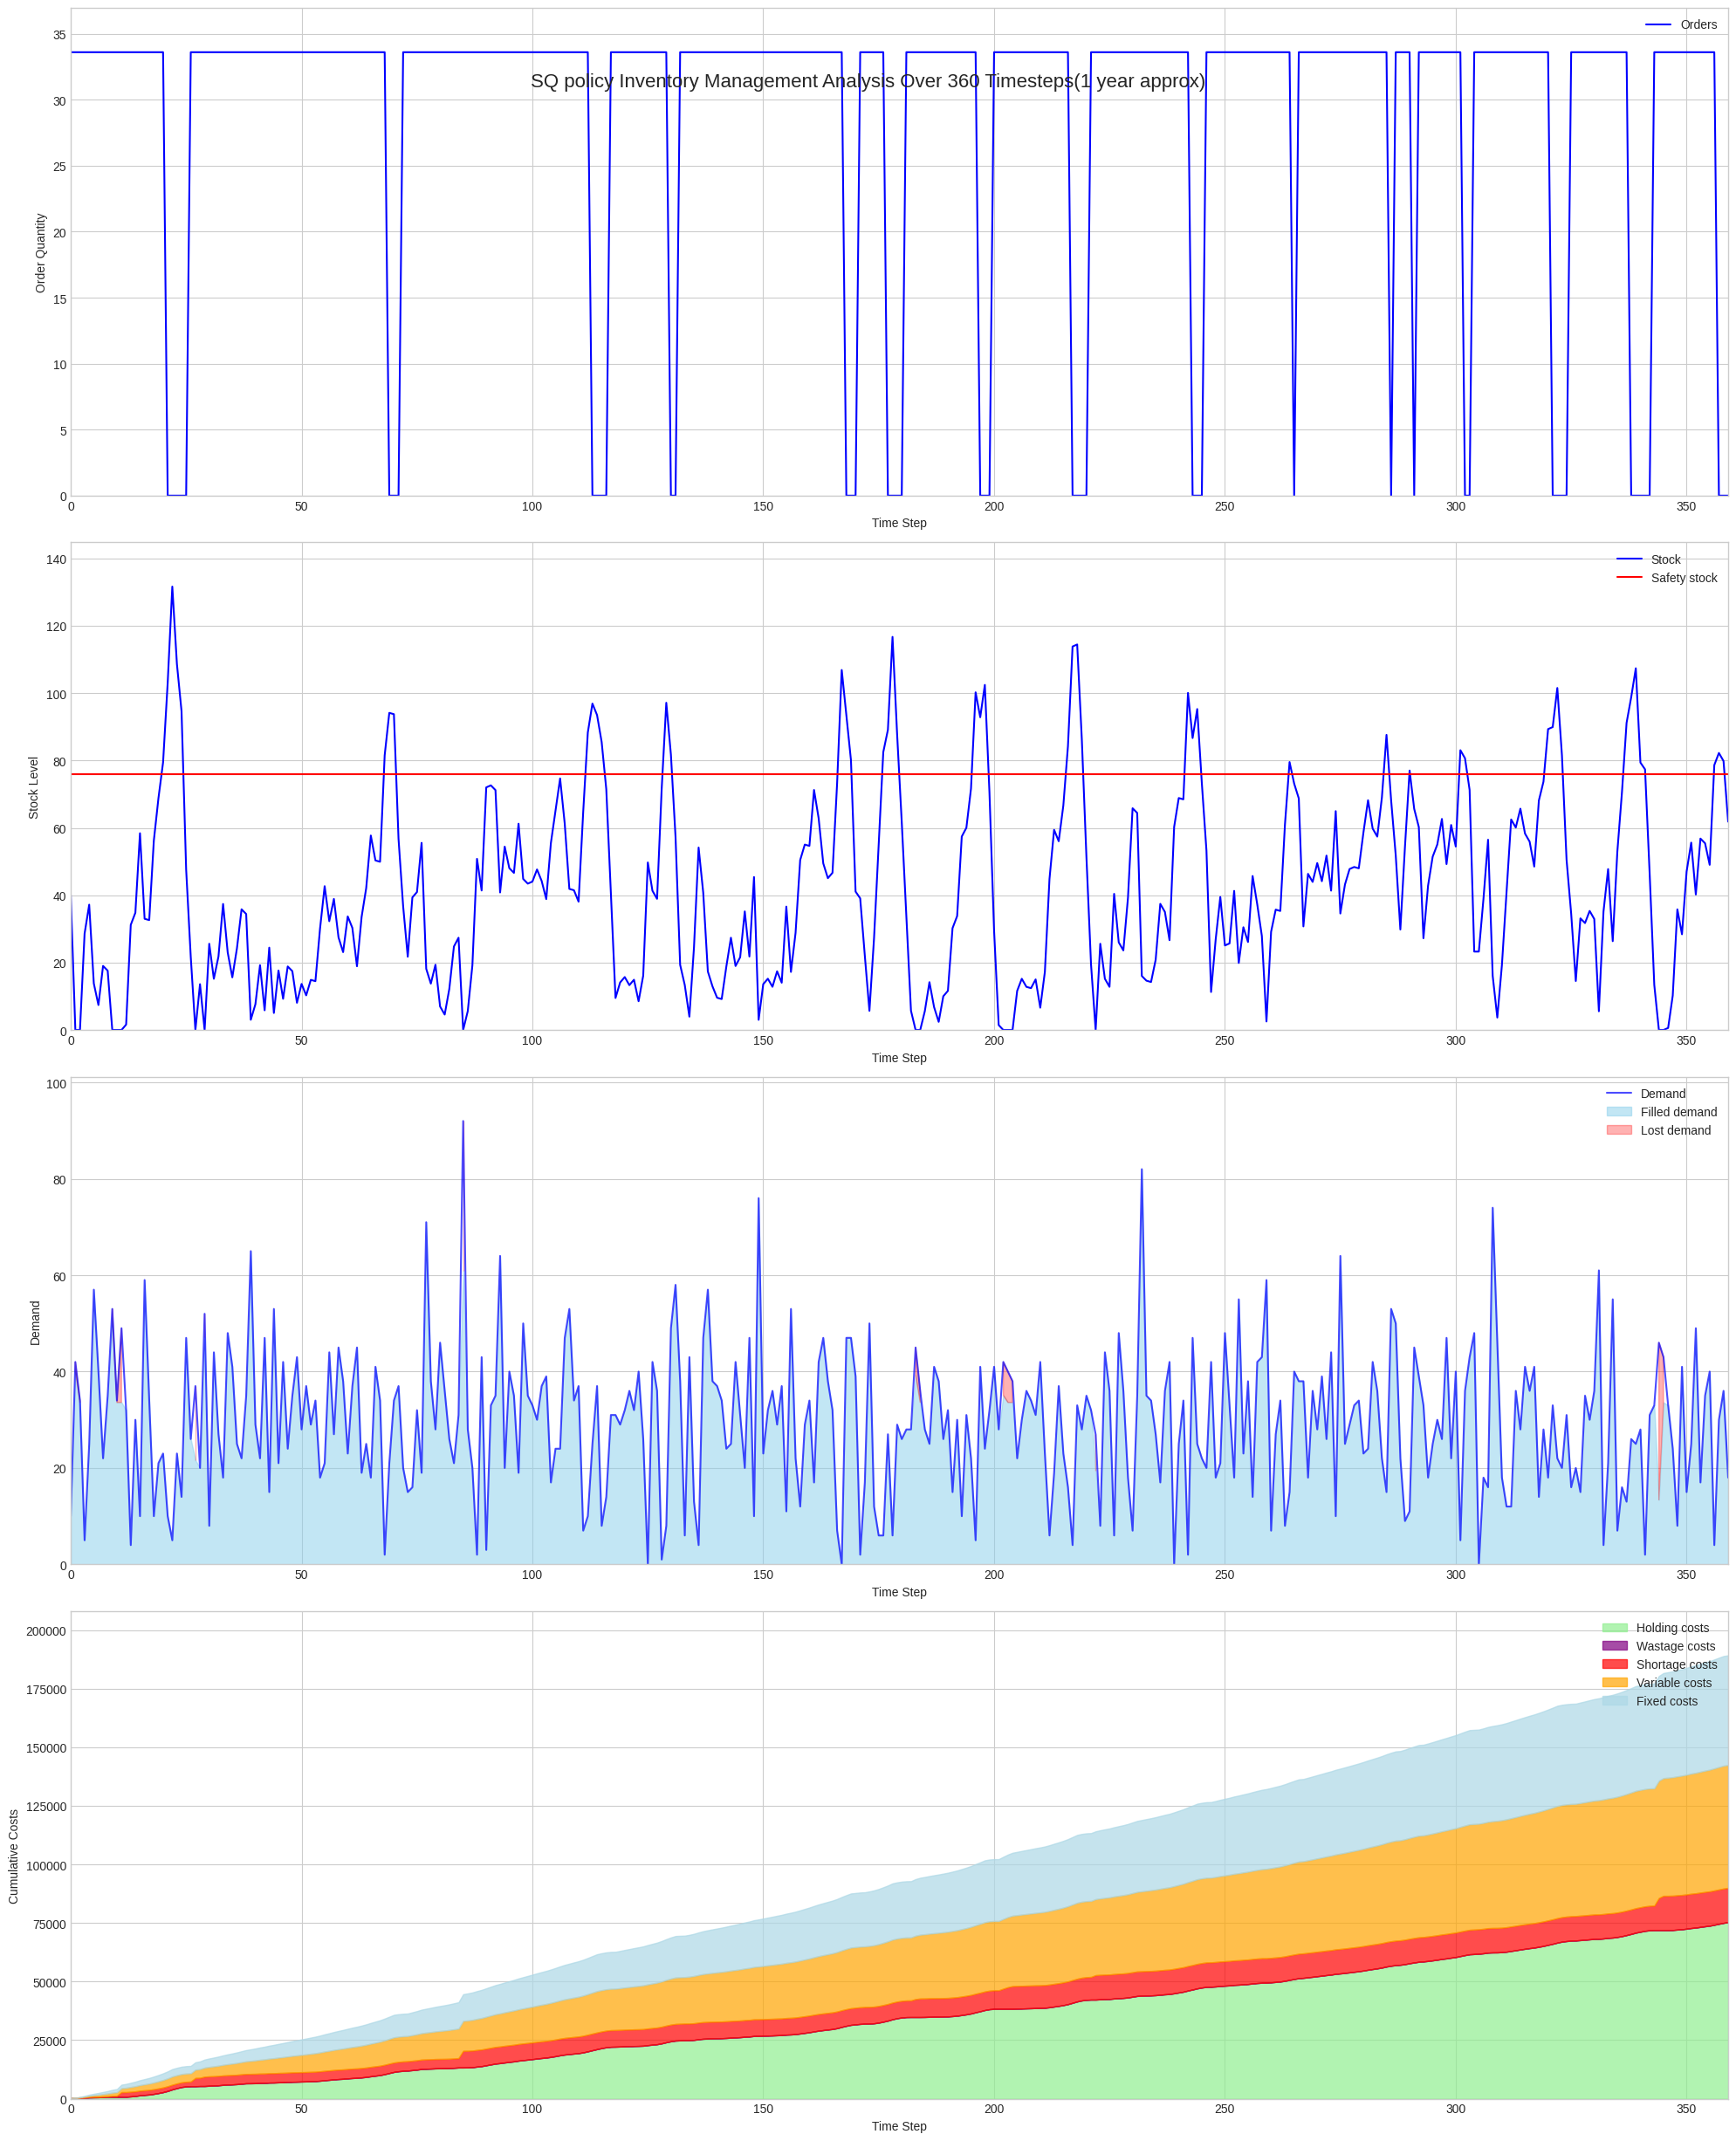

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
sq_df = pd.read_excel('/content/SQ_test_data_results.xlsx')

# Create a continuous timestep array (0 to 359)
total_timesteps = len(sq_df)
continuous_timesteps = np.arange(total_timesteps)
sq_df['continuous_timestep'] = continuous_timesteps

# Set style and figure size
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(20, 25))
fig.tight_layout(pad=4.0)

# 1. Orders Plot
axs[0].plot(sq_df['continuous_timestep'], sq_df['order_quantity'], 'b-', label='Orders')
axs[0].set_ylabel('Order Quantity')
axs[0].set_xlabel('Time Step')
axs[0].set_xlim(0, 359)
axs[0].set_ylim(0, sq_df['order_quantity'].max() * 1.1)  # Add 10% padding
axs[0].legend()
axs[0].grid(True)



# 2. Stock and Safety Stock Level
axs[1].plot(sq_df['continuous_timestep'], sq_df['inventory_level'], 'b-', label='Stock')
sq_safety_stock = sq_df['reorder_point_s'].iloc[0]
axs[1].axhline(y=sq_safety_stock, color='r', linestyle='-', label='Safety stock')
axs[1].set_ylabel('Stock Level')
axs[1].set_xlabel('Time Step')
axs[1].set_xlim(0, 359)
sq_max_stock = max(sq_df['inventory_level'].max(), sq_safety_stock)
axs[1].set_ylim(0, sq_max_stock * 1.1)  # Add 10% padding
axs[1].legend()
axs[1].grid(True)

# 3. Demand Fulfillment
sq_demand = sq_df['demand'].values
sq_fulfilled = sq_df['fulfilled_demand'].values
sq_unfulfilled = sq_df['unfulfilled_demand'].values

axs[2].plot(sq_df['continuous_timestep'], sq_demand, 'b-', label='Demand', alpha=0.7)
axs[2].fill_between(sq_df['continuous_timestep'], sq_fulfilled, color='skyblue', alpha=0.5, label='Filled demand')
axs[2].fill_between(sq_df['continuous_timestep'], sq_demand, sq_fulfilled,
                    where=(sq_demand > sq_fulfilled),
                    color='red', alpha=0.3, label='Lost demand')
axs[2].set_ylabel('Demand')
axs[2].set_xlabel('Time Step')
axs[2].set_xlim(0, 359)
axs[2].set_ylim(0, sq_df['demand'].max() * 1.1)  # Add 10% padding
axs[2].legend()
axs[2].grid(True)

# 4. Cumulative Costs (including all cost components)
sq_cumulative_fixed = np.cumsum(sq_df['fixed_transport_cost'])
sq_cumulative_variable = np.cumsum(sq_df['variable_transport_cost'])
sq_cumulative_holding = np.cumsum(sq_df['holding_cost'])
sq_cumulative_wastage = np.cumsum(sq_df['wastage_cost'])
sq_cumulative_shortage = np.cumsum(sq_df['shortage_cost'])

# Plot all cost components
axs[3].fill_between(sq_df['continuous_timestep'], 0, sq_cumulative_holding,
                    label='Holding costs', alpha=0.7, color='lightgreen')
axs[3].fill_between(sq_df['continuous_timestep'], sq_cumulative_holding,
                    sq_cumulative_holding + sq_cumulative_wastage,
                    label='Wastage costs', alpha=0.7, color='purple')
axs[3].fill_between(sq_df['continuous_timestep'], sq_cumulative_holding + sq_cumulative_wastage,
                    sq_cumulative_holding + sq_cumulative_wastage + sq_cumulative_shortage,
                    label='Shortage costs', alpha=0.7, color='red')
axs[3].fill_between(sq_df['continuous_timestep'],
                    sq_cumulative_holding + sq_cumulative_wastage + sq_cumulative_shortage,
                    sq_cumulative_holding + sq_cumulative_wastage + sq_cumulative_shortage + sq_cumulative_variable,
                    label='Variable costs', alpha=0.7, color='orange')
axs[3].fill_between(sq_df['continuous_timestep'],
                    sq_cumulative_holding + sq_cumulative_wastage + sq_cumulative_shortage + sq_cumulative_variable,
                    sq_cumulative_holding + sq_cumulative_wastage + sq_cumulative_shortage + sq_cumulative_variable + sq_cumulative_fixed,
                    label='Fixed costs', alpha=0.7, color='lightblue')

axs[3].set_ylabel('Cumulative Costs')
axs[3].set_xlabel('Time Step')
axs[3].set_xlim(0, 359)
sq_total_costs = (sq_cumulative_holding + sq_cumulative_wastage + sq_cumulative_shortage +
               sq_cumulative_variable + sq_cumulative_fixed)
axs[3].set_ylim(0, sq_total_costs.max() * 1.1)  # Add 10% padding
axs[3].legend()
axs[3].grid(True)

# Add main title
fig.suptitle('SQ policy Inventory Management Analysis Over 360 Timesteps(1 year approx)', fontsize=16, y=0.95)

# Adjust layout and save
plt.tight_layout()
plt.savefig('sq_timesteps_testing_graphs.png', dpi=300, bbox_inches='tight')
plt.show()

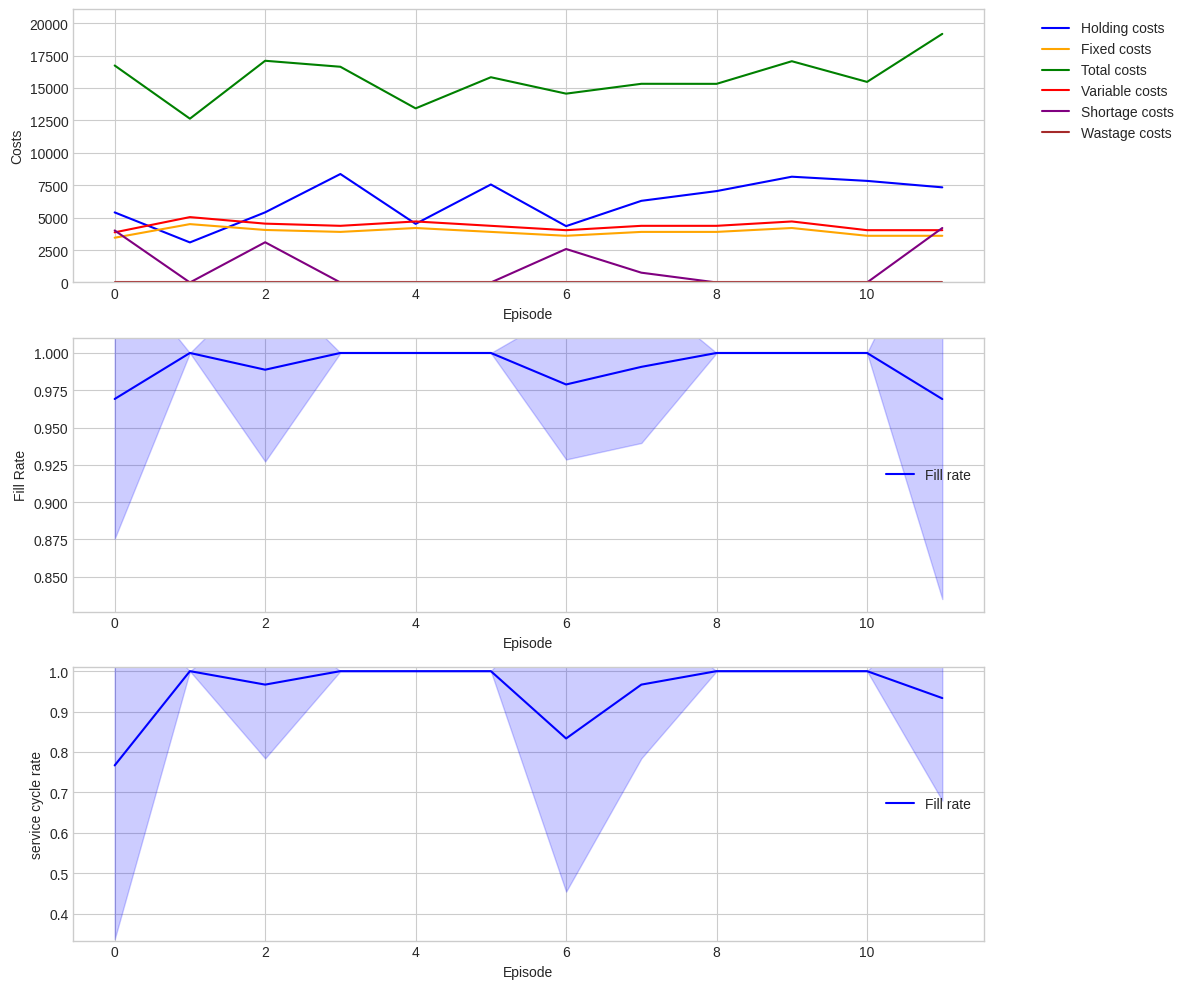

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_excel('/content/SQ_test_data_results.xlsx')

# Calculate episode-wise means for costs and fill rate
sq_episode_stats = df.groupby('episode').agg({
    'wastage_cost': 'sum',
    'holding_cost': 'sum',
    'fixed_transport_cost': 'sum',
    'variable_transport_cost': 'sum',
    'shortage_cost': 'sum',
    'total_cost': 'sum',
    'fill_rate': 'mean',
    'service_cycle_rate': 'mean'
}).reset_index()

# Create figure with two subplots
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(12, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Costs over episodes
sq_episodes = sq_episode_stats['episode']
ax1.plot(sq_episodes, sq_episode_stats['holding_cost'], 'b-', label='Holding costs')
ax1.plot(sq_episodes, sq_episode_stats['fixed_transport_cost'], color='orange', label='Fixed costs')
ax1.plot(sq_episodes, sq_episode_stats['total_cost'], 'g-', label='Total costs')
ax1.plot(sq_episodes, sq_episode_stats['variable_transport_cost'], 'r-', label='Variable costs')
ax1.plot(sq_episodes, sq_episode_stats['shortage_cost'], 'purple', label='Shortage costs')
ax1.plot(sq_episodes, sq_episode_stats['wastage_cost'], 'brown', label='Wastage costs')

# Set y-axis limits with some padding
sq_max_costs = sq_episode_stats[['holding_cost', 'fixed_transport_cost', 'total_cost',
                         'variable_transport_cost', 'shortage_cost', 'wastage_cost']].max().max()
ax1.set_ylim(0, sq_max_costs * 1.1)

# Customize first plot
ax1.set_xlabel('Episode')
ax1.set_ylabel('Costs')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Plot 2: Fill rate over episodes with confidence interval
sq_fill_rate_std = df.groupby('episode')['fill_rate'].std()
sq_fill_rate_mean = sq_episode_stats['fill_rate']

ax2.plot(sq_episodes, sq_fill_rate_mean, 'b-', label='Fill rate')
ax2.fill_between(sq_episodes,
                 sq_fill_rate_mean - sq_fill_rate_std,
                 sq_fill_rate_mean + sq_fill_rate_std,
                 alpha=0.2, color='blue')

# Set y-axis limits for fill rate
sq_min_fill = (sq_fill_rate_mean - sq_fill_rate_std).min()
sq_max_fill = (sq_fill_rate_mean + sq_fill_rate_std).max()
ax2.set_ylim(max(0, sq_min_fill * 0.99), min(1.01, sq_max_fill * 1.00))

# Customize second plot
ax2.set_xlabel('Episode')
ax2.set_ylabel('Fill Rate')
ax2.legend(loc='center right')
ax2.grid(True)

# Plot 3: service cycle rate over episodes with confidence interval
sq_service_cycle_rate_std = df.groupby('episode')['service_cycle_rate'].std()
sq_service_cycle_rate_mean = sq_episode_stats['service_cycle_rate']

ax3.plot(sq_episodes, sq_service_cycle_rate_mean, 'b-', label='Fill rate')
ax3.fill_between(sq_episodes,
                 sq_service_cycle_rate_mean - sq_service_cycle_rate_std,
                 sq_service_cycle_rate_mean + sq_service_cycle_rate_std,
                 alpha=0.2, color='blue')

# Set y-axis limits for fill rate
sq_min_scr = (sq_service_cycle_rate_mean - sq_service_cycle_rate_std).min()
sq_max_scr = (sq_service_cycle_rate_mean + sq_service_cycle_rate_std).max()
ax3.set_ylim(max(0, sq_min_scr * 0.99), min(1.01, sq_max_scr * 1.00))

# Customize second plot
ax3.set_xlabel('Episode')
ax3.set_ylabel('service cycle rate')
ax3.legend(loc='center right')
ax3.grid(True)

# Adjust layout and save
plt.tight_layout()
plt.savefig('sq_episode_testing_graphs.png', dpi=300, bbox_inches='tight')
plt.show()

RS POLICY GRAPHS(test data)

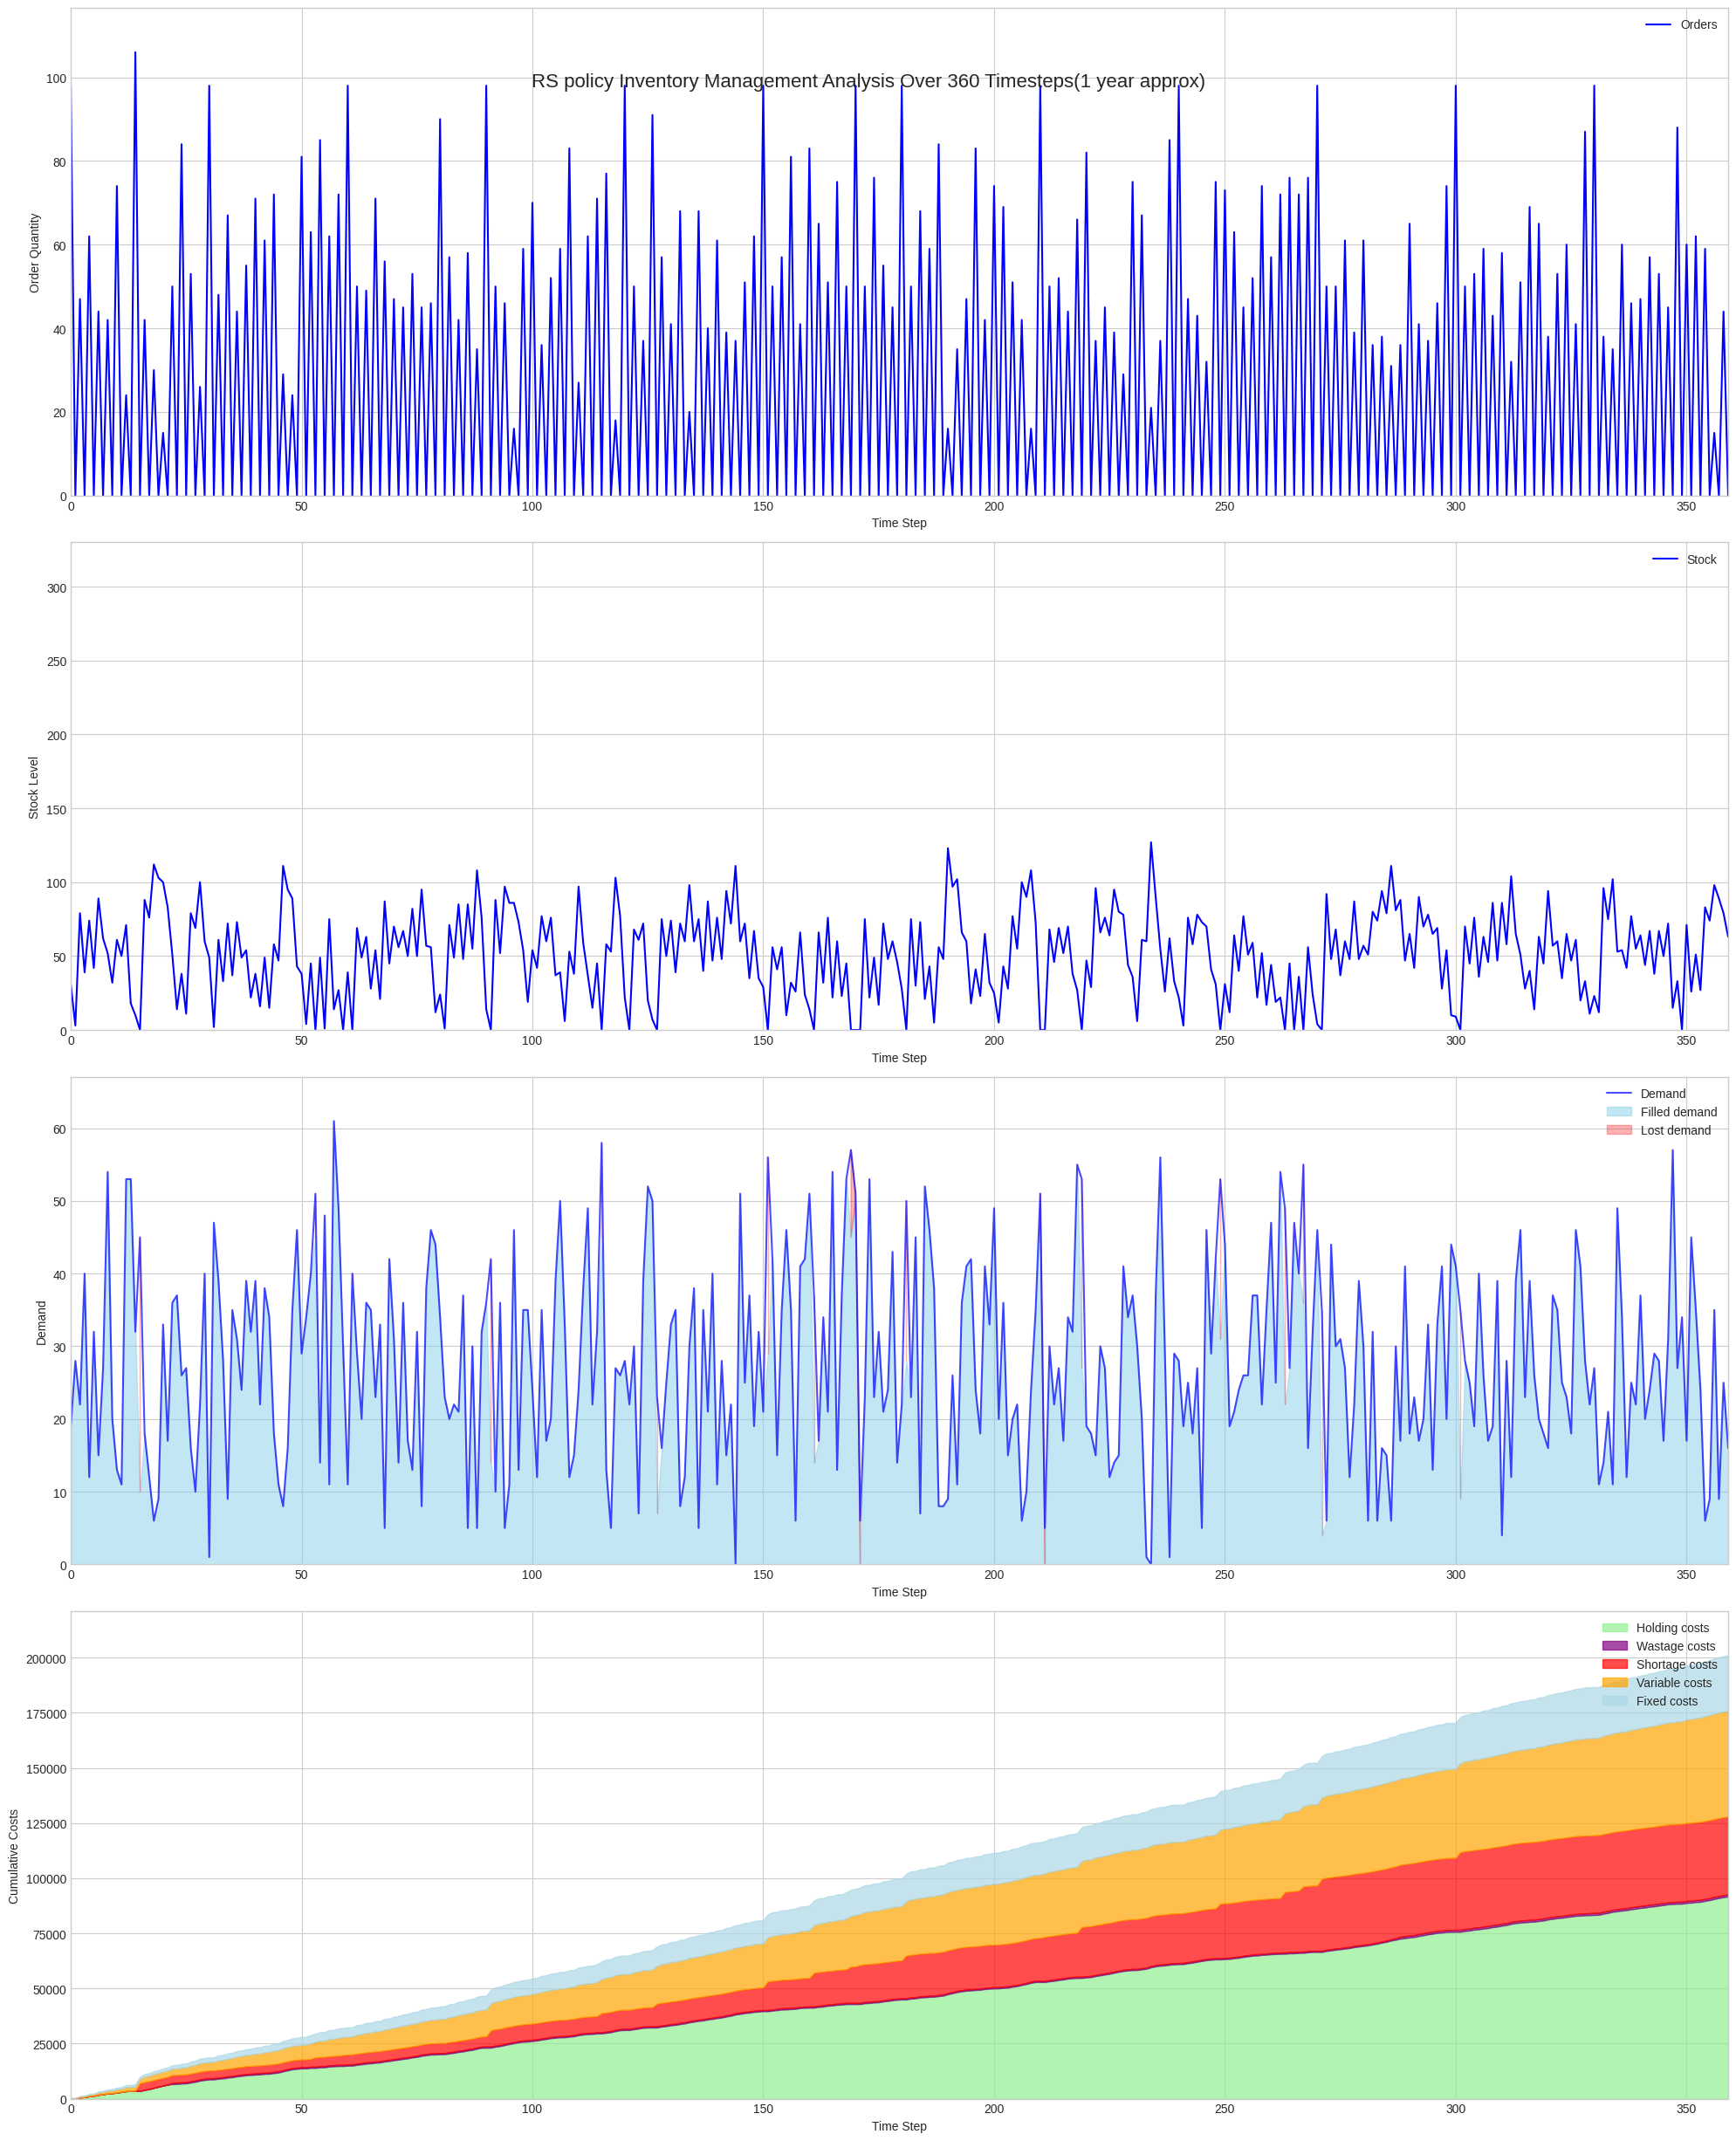

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
rs_df = pd.read_excel('/content/RS_test_data_results.xlsx')

# Create a continuous timestep array (0 to 359)
total_timesteps = len(rs_df)
continuous_timesteps = np.arange(total_timesteps)
rs_df['continuous_timestep'] = continuous_timesteps

# Set style and figure size
plt.style.use('seaborn-v0_8-whitegrid')
fig, axs = plt.subplots(4, 1, figsize=(20, 25))
fig.tight_layout(pad=4.0)

# 1. Orders Plot
axs[0].plot(rs_df['continuous_timestep'], rs_df['order_quantity'], 'b-', label='Orders')
axs[0].set_ylabel('Order Quantity')
axs[0].set_xlabel('Time Step')
axs[0].set_xlim(0, 359)
axs[0].set_ylim(0, rs_df['order_quantity'].max() * 1.1)  # Add 10% padding
axs[0].legend()
axs[0].grid(True)

# 2. Stock levels
axs[1].plot(rs_df['continuous_timestep'], rs_df['inventory_level'], 'b-', label='Stock')
axs[1].set_ylabel('Stock Level')
axs[1].set_xlabel('Time Step')
axs[1].set_xlim(0, 359)
axs[1].set_ylim(0, 300 * 1.1)  # Add 10% padding
axs[1].legend()
axs[1].grid(True)

# 3. Demand Fulfillment
rs_demand = rs_df['demand'].values
rs_fulfilled = rs_df['fulfilled_demand'].values
rs_unfulfilled = rs_df['unfulfilled_demand'].values

axs[2].plot(rs_df['continuous_timestep'], rs_demand, 'b-', label='Demand', alpha=0.7)
axs[2].fill_between(rs_df['continuous_timestep'], rs_fulfilled, color='skyblue', alpha=0.5, label='Filled demand')
axs[2].fill_between(rs_df['continuous_timestep'], rs_demand, rs_fulfilled,
                    where=(rs_demand > rs_fulfilled),
                    color='red', alpha=0.3, label='Lost demand')
axs[2].set_ylabel('Demand')
axs[2].set_xlabel('Time Step')
axs[2].set_xlim(0, 359)
axs[2].set_ylim(0, rs_df['demand'].max() * 1.1)  # Add 10% padding
axs[2].legend()
axs[2].grid(True)

# 4. Cumulative Costs (including all cost components)
rs_cumulative_fixed = np.cumsum(rs_df['fixed_transport_cost'])
rs_cumulative_variable = np.cumsum(rs_df['variable_transport_cost'])
rs_cumulative_holding = np.cumsum(rs_df['holding_cost'])
rs_cumulative_wastage = np.cumsum(rs_df['wastage_cost'])
rs_cumulative_shortage = np.cumsum(rs_df['shortage_cost'])

# Plot all cost components
axs[3].fill_between(rs_df['continuous_timestep'], 0, rs_cumulative_holding,
                    label='Holding costs', alpha=0.7, color='lightgreen')
axs[3].fill_between(rs_df['continuous_timestep'], rs_cumulative_holding,
                    rs_cumulative_holding + rs_cumulative_wastage,
                    label='Wastage costs', alpha=0.7, color='purple')
axs[3].fill_between(rs_df['continuous_timestep'], rs_cumulative_holding + rs_cumulative_wastage,
                    rs_cumulative_holding + rs_cumulative_wastage + rs_cumulative_shortage,
                    label='Shortage costs', alpha=0.7, color='red')
axs[3].fill_between(rs_df['continuous_timestep'],
                    rs_cumulative_holding + rs_cumulative_wastage + rs_cumulative_shortage,
                    rs_cumulative_holding + rs_cumulative_wastage + rs_cumulative_shortage + rs_cumulative_variable,
                    label='Variable costs', alpha=0.7, color='orange')
axs[3].fill_between(rs_df['continuous_timestep'],
                    rs_cumulative_holding + rs_cumulative_wastage + rs_cumulative_shortage + rs_cumulative_variable,
                    rs_cumulative_holding + rs_cumulative_wastage + rs_cumulative_shortage + rs_cumulative_variable + rs_cumulative_fixed,
                    label='Fixed costs', alpha=0.7, color='lightblue')

axs[3].set_ylabel('Cumulative Costs')
axs[3].set_xlabel('Time Step')
axs[3].set_xlim(0, 359)
rs_total_costs = (rs_cumulative_holding + rs_cumulative_wastage + rs_cumulative_shortage +
               rs_cumulative_variable + rs_cumulative_fixed)
axs[3].set_ylim(0, rs_total_costs.max() * 1.1)  # Add 10% padding
axs[3].legend()
axs[3].grid(True)

# Add main title
fig.suptitle('RS policy Inventory Management Analysis Over 360 Timesteps(1 year approx)', fontsize=16, y=0.95)

# Adjust layout and save
plt.tight_layout()
plt.savefig('rs_timesteps_testing_graphs.png', dpi=300, bbox_inches='tight')
plt.show()

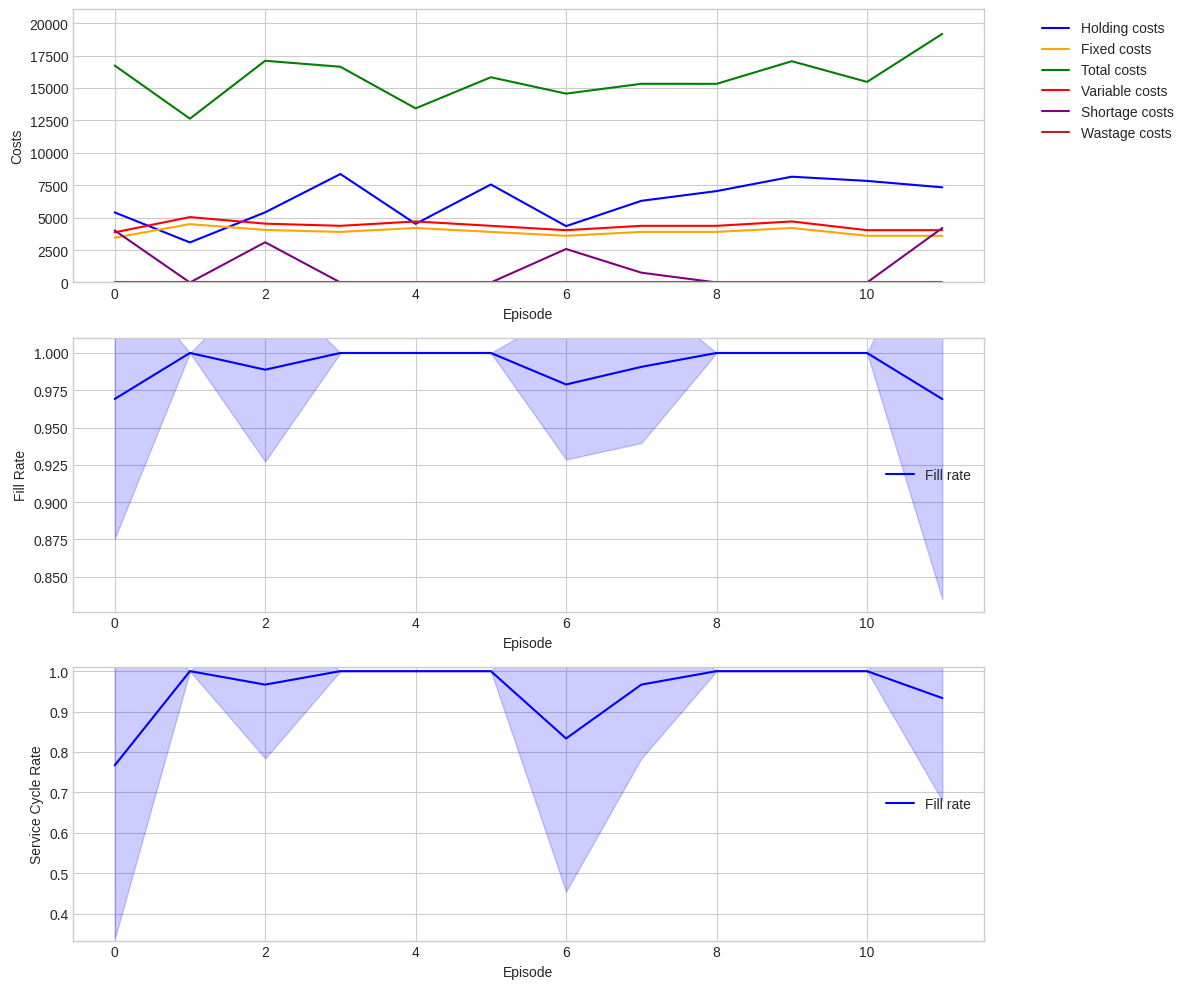

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Calculate episode-wise means for costs and fill rate
rs_episode_stats = df.groupby('episode').agg({
    'wastage_cost': 'sum',
    'holding_cost': 'sum',
    'fixed_transport_cost': 'sum',
    'variable_transport_cost': 'sum',
    'shortage_cost': 'sum',
    'total_cost': 'sum',
    'fill_rate': 'mean',
    'service_cycle_rate': 'mean'
}).reset_index()

# Create figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# Plot 1: Costs over episodes
rs_episodes = rs_episode_stats['episode']
ax1.plot(rs_episodes, rs_episode_stats['holding_cost'], 'b-', label='Holding costs')
ax1.plot(rs_episodes, rs_episode_stats['fixed_transport_cost'], color='orange', label='Fixed costs')
ax1.plot(rs_episodes, rs_episode_stats['total_cost'], 'g-', label='Total costs')
ax1.plot(rs_episodes, rs_episode_stats['variable_transport_cost'], 'r-', label='Variable costs')
ax1.plot(rs_episodes, rs_episode_stats['shortage_cost'], 'purple', label='Shortage costs')
ax1.plot(rs_episodes, rs_episode_stats['wastage_cost'], 'brown', label='Wastage costs')

# Set y-axis limits with some padding
rs_max_costs = rs_episode_stats[['holding_cost', 'fixed_transport_cost', 'total_cost',
                         'variable_transport_cost', 'shortage_cost', 'wastage_cost']].max().max()
ax1.set_ylim(0, rs_max_costs * 1.1)

# Customize first plot
ax1.set_xlabel('Episode')
ax1.set_ylabel('Costs')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True)

# Plot 2: Fill rate over episodes with confidence interval
rs_fill_rate_std = df.groupby('episode')['fill_rate'].std()
rs_fill_rate_mean = rs_episode_stats['fill_rate']

ax2.plot(rs_episodes, rs_fill_rate_mean, 'b-', label='Fill rate')
ax2.fill_between(rs_episodes,
                 rs_fill_rate_mean - rs_fill_rate_std,
                 rs_fill_rate_mean + rs_fill_rate_std,
                 alpha=0.2, color='blue')

# Set y-axis limits for fill rate
rs_min_fill = (rs_fill_rate_mean - rs_fill_rate_std).min()
rs_max_fill = (rs_fill_rate_mean + rs_fill_rate_std).max()
ax2.set_ylim(max(0, rs_min_fill * 0.99), min(1.01, rs_max_fill * 1.00))

# Customize second plot
ax2.set_xlabel('Episode')
ax2.set_ylabel('Fill Rate')
ax2.legend(loc='center right')
ax2.grid(True)

# Plot 3: service cycle rate over episodes with confidence interval
rs_service_cycle_rate_std = df.groupby('episode')['service_cycle_rate'].std()
rs_service_cycle_rate_mean = rs_episode_stats['service_cycle_rate']

ax3.plot(rs_episodes, rs_service_cycle_rate_mean, 'b-', label='Fill rate')
ax3.fill_between(rs_episodes,
                 rs_service_cycle_rate_mean - rs_service_cycle_rate_std,
                 rs_service_cycle_rate_mean + rs_service_cycle_rate_std,
                 alpha=0.2, color='blue')

# Set y-axis limits for service cycle rate
rs_min_scr = (rs_service_cycle_rate_mean - rs_service_cycle_rate_std).min()
rs_max_scr = (rs_service_cycle_rate_mean + rs_service_cycle_rate_std).max()
ax3.set_ylim(max(0, rs_min_scr * 0.99), min(1.01, rs_max_scr * 1.00))

# Customize third plot
ax3.set_xlabel('Episode')
ax3.set_ylabel('Service Cycle Rate')
ax3.legend(loc='center right')
ax3.grid(True)

# Adjust layout and save
plt.tight_layout()
plt.savefig('rs_episode_testing_graphs.png', dpi=300, bbox_inches='tight')
plt.show()
